In [4]:
%load_ext autoreload
%autoreload 2

In [39]:
import os
import sys

import autograd.numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation

import seaborn as sns

from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

# Evaluation Pipeline

## Fitness Function

In [25]:
f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [26]:
xmin, xmax, xstep = -4.5, 4.5, 0.2
ymin, ymax, ystep = -4.5, 4.5, 0.2

X, Y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep),
                   np.arange(ymin, ymax + ystep, ystep))

Z = f(X, Y)

In [27]:
minima = np.array([3.0, 0.5])

f(*minima)

0.0

In [28]:
minima_ = minima.reshape(-1, 1)
minima_

array([[3. ],
       [0.5]])

In [29]:
f(*minima_)

array([0.])

## 3D Surface Plot 

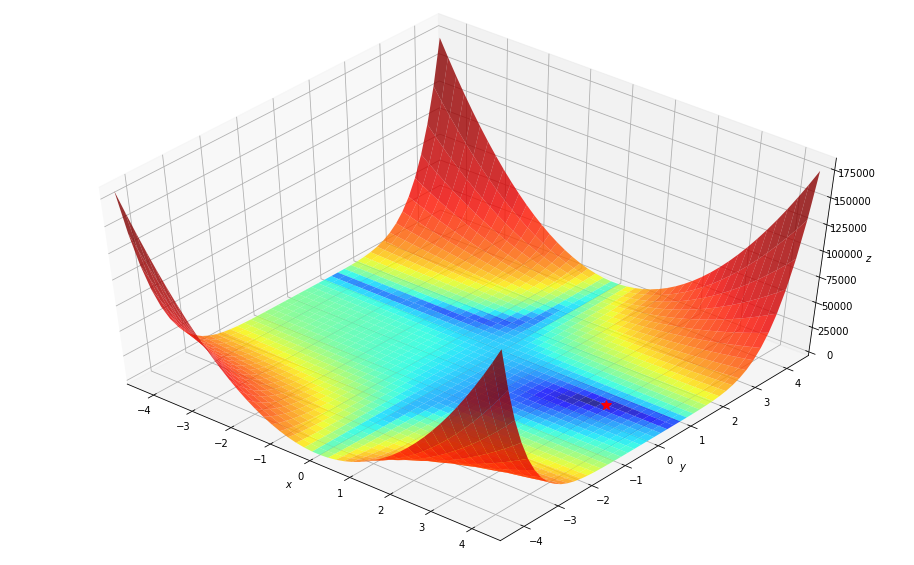

In [42]:
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(X, Y, Z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)

ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

## 2D Gradient Vector Field 

In [33]:
δz_δx = elementwise_grad(f, argnum=0)(X, Y)
δz_δy = elementwise_grad(f, argnum=1)(X, Y)

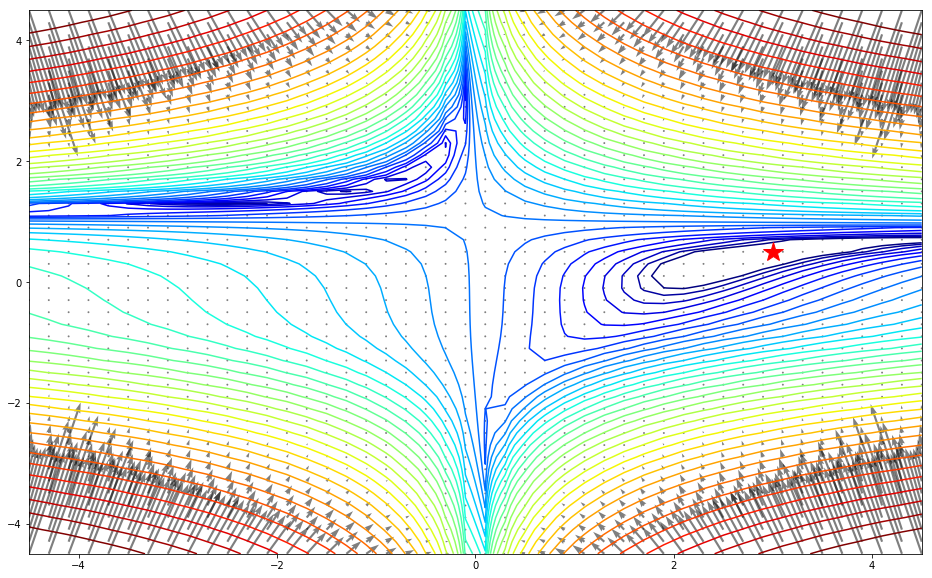

In [47]:
fig, axes = plt.subplots(figsize=(16, 10))

axes.contour(X, Y, Z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
axes.quiver(X, Y, X - δz_δx, Y - δz_δy, alpha=0.5)
axes.plot(*minima_, 'r*', markersize=20)

plt.show()